# Demographic Analysis by State for Startups

### Population Distribution by Age of the State/District One Wishes to Analyze

In [1]:
import csv
import matplotlib.pyplot as plt
f=open('age_sex_population.csv','r')
data=csv.reader(f)
for i in data:
    print(i)
f.close()

In [ ]:
# Dataframe in Pandas (Users can refer to the table below when making decisions)

In [2]:
import numpy as np
import pandas as pd

# Setting Up Pandas
pd.set_option('display.max_columns',18)
pd.set_option('display.max_rows',13572)

df=pd.read_csv('age_sex_population.csv')
df

In [3]:
# Name, sex, age, and 2019 population are the data that we need
df[['NAME','SEX','AGE','POPEST2019_CIV']]

In [4]:
# List of States and District in America that users can refer to when doing a research
def state_name():
    states=[]
    f=open('age_sex_population.csv','r')
    data=csv.reader(f)
    next(data)
    for i in data:
        if i[4]!='United States':
            if i[4] not in states:
                states.append(i[4])
    f.close()
    return states
state=state_name()
print(state)
print()
print('We will analyze population distribution in '+str(len(state))+' states and district in America.')

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Referring to the states/district list above, enter the state you wish to analyze: 
Connecticut


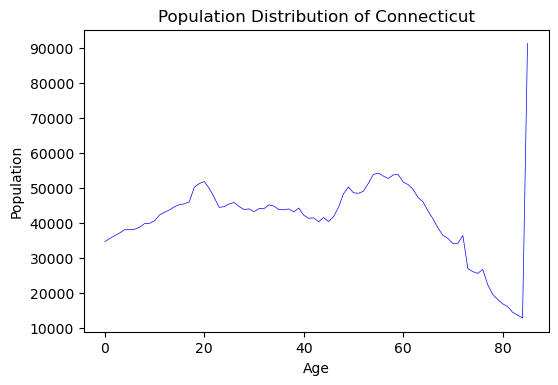

In [207]:
print(state_name())
print()
population=[]
age_scale=[]

while True:
    f=open('age_sex_population.csv','r')
    data=csv.reader(f)
    next(data) # to skip the first row
    flag=0
    state=input('Referring to the states/district list above, enter the state you wish to analyze: \n')
    for i in data:
        if state==i[4]:
            flag=1
            if i[5]=='0':
                if i[6]!='999':
                    population.append(int(i[17]))
    if flag==0:
        print('Please re-enter the state you wish to analyze.')
        continue
    else:
        break
            
for i in range(86):
    age_scale.append(i)
    
plt.figure(dpi=100)
title='Population Distribution of '+state
plt.title(title)
plt.plot(age_scale,population,color='b',linewidth=0.5)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

population_order=population.copy()
age_range=age_scale.copy()
for i in range(len(population)):
    for j in range(i,len(population)):
        if population_order[i]<population_order[j]:
            population_order[i],population_order[j]=population_order[j],population_order[i]
            age_range[i],age_range[j]=age_range[j],age_range[i]
        

file=open('population analysis saver.txt','a')
file.write('Top 5 age group in order of the highest population in '+state+':\n')
for i in range(5):
    file.write(str(age_range[i])+': '+str(population_order[i])+'\n')
file.write('Top 5 age group in order of the lowest population in '+state+':\n')
for i in range(51,46,-1):
    file.write(str(age_range[i])+': '+str(population_order[i])+'\n')
file.close()

f.close()

In [5]:
# prints population information in a table
filt=(df['NAME']==state) & (df['SEX']==0)
df.loc[filt,['NAME','SEX','AGE','POPEST2019_CIV']]

### Male/Female Population Distribution by Age of the State One Wishes to Analyze

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Referring to the states/district list above, enter the state you wish to analyze: 
New York


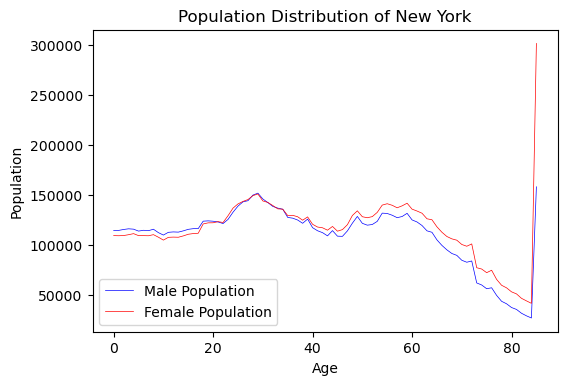

In [208]:
print(state_name())
print()
male_pop=[]
female_pop=[]
age_scale=[]

while True:
    f=open('age_sex_population.csv','r')
    data=csv.reader(f)
    next(data)
    flag=0
    state_mf=input('Referring to the states/district list above, enter the state you wish to analyze: \n')
    for i in data:
        if state_mf==i[4]:
            flag=1
            if i[5]=='1':
                if i[6]!='999':
                    male_pop.append(int(i[17]))
            elif i[5]=='2':
                if i[6]!='999':
                    female_pop.append(int(i[17]))
    if flag==0:
        print()
        print('Please re-enter the state you wish to analyze.')
        continue
    else:
        break
            
for i in range(86):
    age_scale.append(i)
    
plt.figure(dpi=100)
title='Population Distribution of '+state_mf
plt.title(title)
plt.plot(age_scale,male_pop,color='b',linewidth=0.5,label='Male Population')
plt.plot(age_scale,female_pop,color='r',linewidth=0.5,label='Female Population')
plt.legend(loc=3)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

female_order=female_pop.copy()
male_order=male_pop.copy()
age_range_m=age_scale.copy()
age_range_f=age_scale.copy()
for i in range(len(female_order)):
    for j in range(i,len(female_order)):
        if female_order[i]<female_order[j]:
            female_order[i],female_order[j]=female_order[j],female_order[i]
            age_range_f[i],age_range_f[j]=age_range_f[j],age_range_f[i]
for i in range(len(male_order)):
    for j in range(i,len(male_order)):
        if male_order[i]<male_order[j]:
            male_order[i],male_order[j]=male_order[j],male_order[i]
            age_range_m[i],age_range_m[j]=age_range_m[j],age_range_m[i]
        
file=open('population analysis saver.txt','a')
file.write('Top 5 age group in order of the highest female population in '+state_mf+':\n')
for i in range(5):
    file.write(str(age_range_f[i])+': '+str(female_order[i])+'\n')
file.write('Top 5 age group in order of the lowest female population in '+state_mf+':\n')
for i in range(51,46,-1):
    file.write(str(age_range_f[i])+': '+str(female_order[i])+'\n')
file.write('Top 5 age group in order of the highest male population in '+state_mf+':\n')
for i in range(5):
    file.write(str(age_range_m[i])+': '+str(male_order[i])+'\n')
file.write('Top 5 age group in order of the lowest male population in '+state_mf+':\n')
for i in range(51,46,-1):
    file.write(str(age_range_m[i])+': '+str(male_order[i])+'\n')
file.close()

f.close()

In [8]:
# prints male and female population information in a table
filt=(df['NAME']==state_mf) & ((df['SEX']==1) | (df['SEX']==2))
df.loc[filt,['NAME','SEX','AGE','POPEST2019_CIV']]

### Another State with the Most Similar Population Distribution by Age

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Referring to the states/district list above, enter the state you wish to analyze: 
Alabama
A state with the most similar population distribution by age: South Carolina


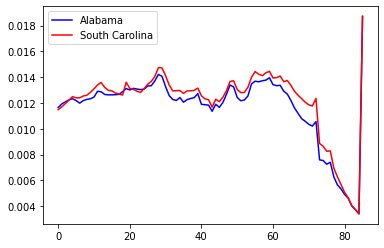

In [209]:
f=open('age_sex_population.csv','r')
data=csv.reader(f)
next(data)
data=list(data)
searching_state_pop_ratio=[] 
print(state_name())
print()
total_pop=0

flag=0
while True:
    state=input('Referring to the states/district list above, enter the state you wish to analyze: \n')
    for i in data:
        if state==i[4]:
            flag=1
    if flag==0:
        print('Please re-enter the state.\n')
        continue
    else:
        break

for i in data:
    if state==i[4]:
        if i[5]=='0':
            if i[6]!='999':
                total_pop+=int(i[17])
for i in data:
    if state==i[4]:
        if i[5]=='0':
            if i[6]!='999':
                searching_state_pop_ratio.append(int(i[17])/total_pop)
    
other_states_dict={}
other_state=''
for i in data:
    if state!=i[4] and i[4]!='United States':
        other_state=i[4]
        if other_state not in other_states_dict:
            if i[5]=='0':
                if i[6]!='999':
                     other_states_dict[other_state]=[int(i[17])/total_pop]
        else:
            if i[5]=='0':
                if i[6]!='999':
                     other_states_dict[other_state].append(int(i[17])/total_pop)

mn=1
similar_state=''
for i in other_states_dict:
    diff_list=[]
    for j in range(0,len(searching_state_pop_ratio)):
        diff_list.append((searching_state_pop_ratio[j]-other_states_dict[i][j])**2)
    s=sum(diff_list)
    if s<mn:
        mn=s
        result=other_states_dict[i].copy()
        similar_state=i

print("A state with the most similar population distribution by age: "+similar_state)
plt.plot(range(0,86),searching_state_pop_ratio,color='blue',label=state)
plt.plot(range(0,86),result,color='red',label=similar_state)
plt.legend()
plt.show()

file=open('population analysis saver.txt','a')
file.write('You searched for the population distribution by age in '+state+'. Other state with the most similar population distribution by age is '+similar_state+'.\n')
file.close()

f.close()

### Another State with the Most Similar Male Population Distribution by Age

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Referring to the states/district list above, enter the state you wish to analyze: 
New York
A state with the most similar male population distribution by age: Florida


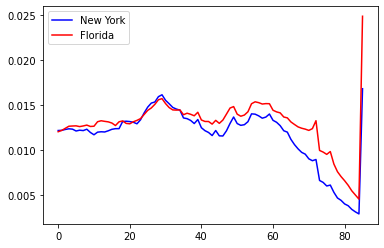

In [210]:
f=open('age_sex_population.csv','r')
data=csv.reader(f)
next(data)
data=list(data)
searching_state_malepop_ratio=[] 
print(state_name())
print()
total_pop=0

flag=0
while True:
    state=input('Referring to the states/district list above, enter the state you wish to analyze: \n')
    for i in data:
        if state==i[4]:
            flag=1
    if flag==0:
        print('Please re-enter the state.\n')
        continue
    else:
        break

for i in data:
    if state==i[4]:
        if i[5]=='1':
            if i[6]!='999':
                total_pop+=int(i[17])
for i in data:
    if state==i[4]:
        if i[5]=='1':
            if i[6]!='999':
                searching_state_malepop_ratio.append(int(i[17])/total_pop)
    
other_states_dict={}
other_state=''
for i in data:
    if state!=i[4] and i[4]!='United States':
        other_state=i[4]
        if other_state not in other_states_dict:
            if i[5]=='1':
                if i[6]!='999':
                     other_states_dict[other_state]=[int(i[17])/total_pop]
        else:
            if i[5]=='1':
                if i[6]!='999':
                     other_states_dict[other_state].append(int(i[17])/total_pop)

mn=1
similar_state=''
for i in other_states_dict:
    diff_list=[]
    for j in range(0,len(searching_state_malepop_ratio)):
        diff_list.append((searching_state_malepop_ratio[j]-other_states_dict[i][j])**2)
    s=sum(diff_list)
    if s<mn:
        mn=s
        result=other_states_dict[i].copy()
        similar_state=i

print("A state with the most similar male population distribution by age: "+similar_state)
plt.plot(range(0,86),searching_state_malepop_ratio,color='blue',label=state)
plt.plot(range(0,86),result,color='red',label=similar_state)
plt.legend()
plt.show()

file=open('population analysis saver.txt','a')
file.write('You searched for the male population distribution by age in '+state+'. Other state with the most similar male population distribution by age is '+similar_state+'.\n')
file.close()

f.close()

### Another State with the Most Similar Female Population Distribution by Age

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Referring to the states/district list above, enter the state you wish to analyze: 
Connecticut
A state with the most similar female population distribution by age: Iowa


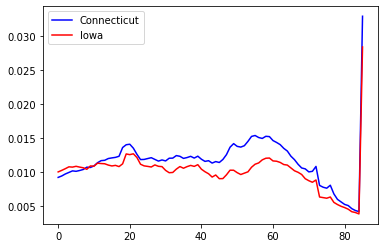

In [211]:
f=open('age_sex_population.csv','r')
data=csv.reader(f)
next(data)
data=list(data)
searching_state_femalepop_ratio=[] 
print(state_name())
print()
total_pop=0

flag=0
while True:
    state=input('Referring to the states/district list above, enter the state you wish to analyze: \n')
    for i in data:
        if state==i[4]:
            flag=1
    if flag==0:
        print('Please re-enter the state.\n')
        continue
    else:
        break

for i in data:
    if state==i[4]:
        if i[5]=='2':
            if i[6]!='999':
                total_pop+=int(i[17])
for i in data:
    if state==i[4]:
        if i[5]=='2':
            if i[6]!='999':
                searching_state_femalepop_ratio.append(int(i[17])/total_pop)
    
other_states_dict={}
other_state=''
for i in data:
    if state!=i[4] and i[4]!='United States':
        other_state=i[4]
        if other_state not in other_states_dict:
            if i[5]=='2':
                if i[6]!='999':
                     other_states_dict[other_state]=[int(i[17])/total_pop]
        else:
            if i[5]=='2':
                if i[6]!='999':
                     other_states_dict[other_state].append(int(i[17])/total_pop)

mn=1
similar_state=''
for i in other_states_dict:
    diff_list=[]
    for j in range(0,len(searching_state_femalepop_ratio)):
        diff_list.append((searching_state_femalepop_ratio[j]-other_states_dict[i][j])**2)
    s=sum(diff_list)
    if s<mn:
        mn=s
        result=other_states_dict[i].copy()
        similar_state=i

print("A state with the most similar female population distribution by age: "+similar_state)
plt.plot(range(0,86),searching_state_femalepop_ratio,color='blue',label=state)
plt.plot(range(0,86),result,color='red',label=similar_state)
plt.legend()
plt.show()

file=open('population analysis saver.txt','a')
file.write('You searched for the female population distribution by age in '+state+'. Other state with the most similar female population distribution by age is '+similar_state+'.\n')
file.close()

f.close()

### States Ranking in Order of the Highest Target Customer Population

In [212]:
f=open('age_sex_population.csv','r')
data=csv.reader(f)
next(data)
data=list(data)

target_agegroup=[]
state_dict={}
pop=[]
ranking=[]

target=[]
while True:
    target_age=input('Please enter the target customer age group one at a time(ex. 0s,10s,20s) Type "end" if done: ')
    target.append(target_age)
    a=target_age.strip('s')
    if target_age!='end' and target_age!='End':
        target_agegroup.append(a)
    else:
        break
        
for i in target_agegroup:
    if i=='0':
        for j in data:
            if j[4]!='United States':
                if j[5]=='0':
                    if len(j[6])==1:
                        if j[4] not in state_dict:
                            state_dict[j[4]]=int(j[17])
                        else:
                            state_dict[j[4]]+=int(j[17])
    else:
        first=i[0]
        for j in data:
            if j[4]!='United States':
                if j[5]=='0':
                    if len(j[6])==2:
                        if j[6][0]==first:
                            if j[4] not in state_dict:
                                state_dict[j[4]]=int(j[17])
                            else:
                                state_dict[j[4]]+=int(j[17])
    
for i in state_dict.values():
    pop.append(i)
    
for i in range(len(pop)):
    for j in range(i,len(pop)):
        if pop[i]<pop[j]:
            pop[i],pop[j]=pop[j],pop[i]
            
for i in pop:
    for j in state_dict:
        if i==state_dict[j]:
            ranking.append(j)

print('\nStates Ranking in Order of the Highest Target Customer Population')
for i in range(0,len(ranking)):
    print('{}. {}'.format(i+1,ranking[i]))

if 'end' in target:
    target.remove('end')
    
    
if 'End' in target:
    target.remove('End')
    
file=open('population analysis saver.txt','a')
file.write('States Ranking in Order of the Highest Target Customer Population\n')
for i in range(len(target)):
    if i!=len(target)-1:
        file.write(' * Your target customer age: {}, '.format(target[i]))
    else:
        file.write('{}'.format(target[i]))
file.write('\n')
for i in range(0,len(ranking)):
    file.write('{}. {}\n'.format(i+1,ranking[i]))
file.close()
    
f.close()

Please enter the target customer age group one at a time(ex. 0s,10s,20s) Type "end" if done: 10
Please enter the target customer age group one at a time(ex. 0s,10s,20s) Type "end" if done: 20
Please enter the target customer age group one at a time(ex. 0s,10s,20s) Type "end" if done: 30
Please enter the target customer age group one at a time(ex. 0s,10s,20s) Type "end" if done: end

States Ranking in Order of the Highest Target Customer Population
1. California
2. Texas
3. Florida
4. New York
5. Illinois
6. Pennsylvania
7. Ohio
8. Georgia
9. North Carolina
10. Michigan
11. New Jersey
12. Virginia
13. Washington
14. Arizona
15. Massachusetts
16. Indiana
17. Tennessee
18. Colorado
19. Missouri
20. Maryland
21. Wisconsin
22. Minnesota
23. South Carolina
24. Alabama
25. Louisiana
26. Kentucky
27. Oregon
28. Oklahoma
29. Utah
30. Connecticut
31. Iowa
32. Nevada
33. Arkansas
34. Mississippi
35. Kansas
36. New Mexico
37. Nebraska
38. Idaho
39. West Virginia
40. Hawaii
41. New Hampshire
42. Ma

### Average Annual Expenditure on Major Types of Items by Age
##### Startups can reference to the data below after the demographic analysis by state to find out the profit-maximizing item in a specific state

In [7]:
df=pd.read_csv('reference-person-age-ranges-2021.csv')
df

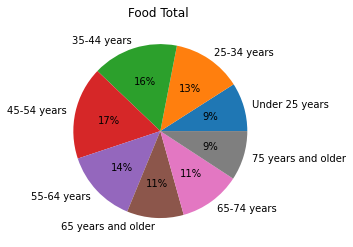

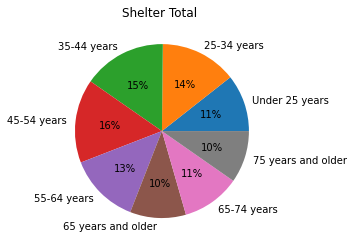

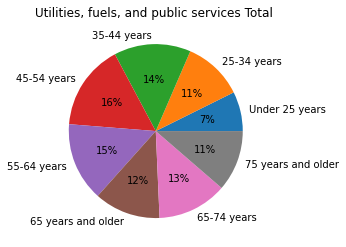

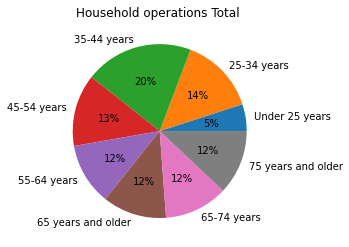

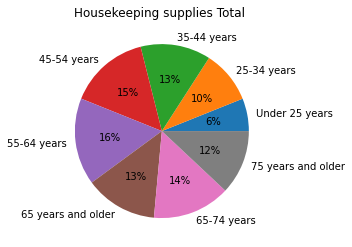

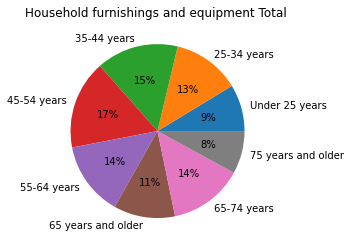

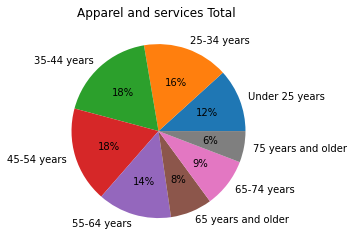

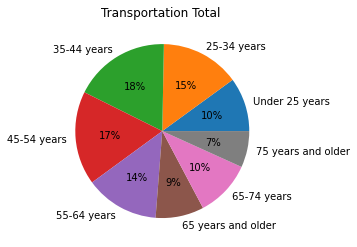

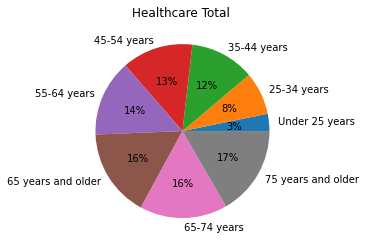

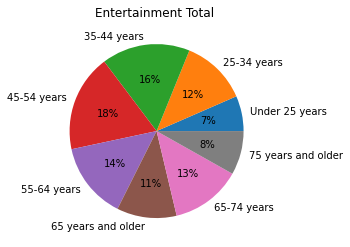

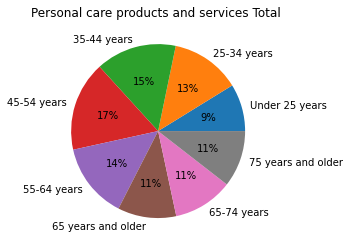

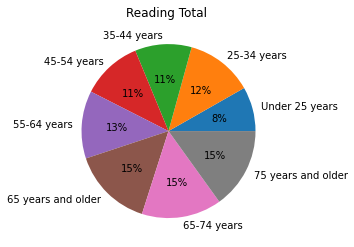

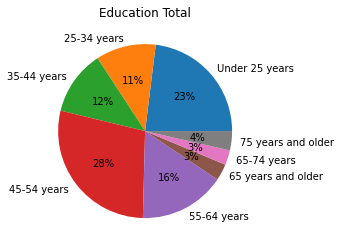

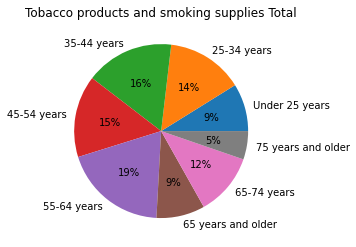

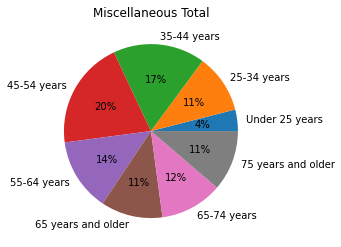

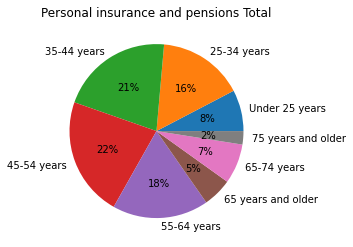

Food
Shelter
Utilities, fuels, and public services
Household operations
Housekeeping supplies
Household furnishings and equipment
Apparel and services
Transportation
Healthcare
Entertainment
Personal insurance and pensions
Type of items listed above can be divided into further details. Which type of item do you want to further explore?: Food

['Food at home', 'Cereals and bakery products', 'Cereals and cereal products', 'Bakery products', 'Meats, poultry, fish, and eggs', 'Beef', 'Pork', 'Other meats', 'Poultry', 'Fish and seafood', 'Eggs', 'Dairy products', 'Fresh milk and cream', 'Other dairy products', 'Fruits and vegetables', 'Fresh fruits', 'Fresh vegetables', 'Processed fruits', 'Processed vegetables', 'Other food at home', 'Sugar and other sweets', 'Fats and oils', 'Miscellaneous foods', 'Nonalcoholic beverages', 'Food prepared by consumer unit on out of town trips', 'Food away from home', 'Alcoholic beverages']
Type of items listed above are the more specific items. Which type 

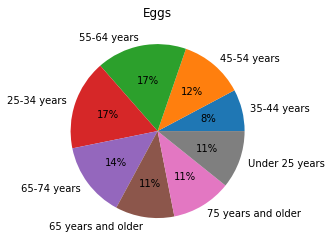

In [213]:
f=open('reference-person-age-ranges-2021.csv')
data=csv.reader(f)
data=list(data)

broad_item=[]
age_expenditure={}
age=[]
for i in range(2,10):
    age.append(data[0][i])

for i in data:
    if 'Total' in i[0]:
        broad_item.append(i[0])
        
for i in broad_item:
    for j in range(len(data)):
        if i==data[j][0]:
            ans=j+1
            age_expenditure[i]=[int(data[ans][2].replace(',',''))]
            for k in range(3,10):
                age_expenditure[i].append(int(data[ans][k].replace(',','')))
        
for i in age_expenditure:
    plt.title('{}'.format(i))
    plt.pie(age_expenditure[i],labels=age, autopct='%1.0f%%')
    plt.show()
    
index=0
items=[]
items_dict={}
for i in range(len(data)):
    key=''
    if ':' in data[i][0]:
        for j in range(len(data[i][0])):
            if data[i][0][j]==':':
                index=j
        for k in range(index+2,len(data[i][0])):
            key+=data[i][0][k]
        items.append(key)
        ans=i+1
        items_dict[key]=[int(data[ans][2].replace(',',''))]
        for n in range(3,10):
            if data[ans][n]=='c/':
                items_dict[key].append(0)
            else:
                items_dict[key].append(int(data[ans][n].replace(',','')))

all_items={}
items=[]
for i in broad_item:
    item=i.split()
    item.remove('Total')
    keyword=' '.join(item)
    items.append(keyword)

for i in items:
    search=i+':'
    for j in data:
        key=''
        if search in j[0]:
            for k in range(len(j[0])):
                if j[0][k]==':':
                    index=k
                    for n in range(index+2,len(j[0])) :
                        key+=j[0][n]
            if i not in all_items:
                all_items[i]=[key]
            else:
                all_items[i].append(key)

for i in all_items:
    print(i)
while True:
    industry=input('Type of items listed above can be divided into further details. Which type of item do you want to further explore?: ')
    if industry not in all_items:
        print()
        print('Please re-enter the item.')
        continue
    else:
        break
for i in all_items:
    if i==industry:
        print()
        print(all_items[i])
while True:
    specific=input("Type of items listed above are the more specific items. Which type of item's average annual expenditure by age do you want to know?: ")
    if specific not in all_items[industry]:
        print('Please re-enter the item')
        continue
    break

age_order=age.copy()
for i in items_dict:
    if i==specific:
        top_order=items_dict[i].copy()
for i in range(0,len(top_order)):
    for j in range(i+1,len(top_order)):
        if top_order[i]<top_order[j]:
            top_order[i],top_order[j]=top_order[j],top_order[i]
            age[i],age[j]=age[j],age[i]
            

for i in items_dict:
    if i==specific:
        plt.title('{}'.format(i))
        plt.pie(items_dict[i],labels=age,autopct='%1.0f%%')
        plt.show()
        
file=open('population analysis saver.txt','a')
file.write('Age group ranking in order of the highest average expenditure on '+industry+' -- '+specific+':\n')
for i in range(len(age_order)):
    num=i+1
    file.write(str(num)+'. '+age_order[i]+' ('+str(top_order[i])+' thousands of consumers)'+'\n')
file.close()
    
f.close()